In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=150)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()

In [6]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
data = pd.read_csv("train_values.csv").drop(columns=["building_id"])
label = pd.read_csv("train_labels.csv")["damage_grade"]

test_data = pd.read_csv("test_values.csv")

### Special Functions

In [9]:
def label_encoder(data):
    for feature in data.columns:
        if data[feature].dtype == np.object:
            data[feature] = encoder.fit_transform(data[feature])
    return data

### Feature Engineering

In [10]:
data["count_floors_pre_eq"] = data["count_floors_pre_eq"].apply(lambda floor: "4" if floor >= 4 else str(floor))
test_data["count_floors_pre_eq"] = \
                                test_data["count_floors_pre_eq"].apply(lambda floor: "4" if floor >= 4 else str(floor))

In [11]:
data["count_families"] = data["count_families"].apply(lambda floor: "4" if floor >= 4 else str(floor))
test_data["count_families"] = \
                            test_data["count_families"].apply(lambda floor: "4" if floor >= 4 else str(floor))

In [12]:
def new_age_variable(age):
    
    if (age <= 10):
        return 1
    elif (age <= 25):
        return 2
    elif (age <= 50):
        return 3
    elif (age <= 100):
        return 4
    else:
        return 5
    
data["age"] = data["age"].apply(new_age_variable)
test_data["age"] = test_data["age"].apply(new_age_variable)

In [13]:
def new_height_variable(height):
    
    if (height <= 4):
        return 1
    elif (height <= 8):
        return 2
    else:
        return 3
    
data["height_percentage"] = data["height_percentage"].apply(new_height_variable)
test_data["height_percentage"] = test_data["height_percentage"].apply(new_height_variable)

In [14]:
def new_area_variable(area):
    
    if (area <= 4):
        return 1
    elif (area <= 10):
        return 2
    else:
        return 3
    
data["area_percentage"] = data["area_percentage"].apply(new_area_variable)
test_data["area_percentage"] = test_data["area_percentage"].apply(new_area_variable)

### Feature Extraction

In [15]:
data["material_used"] = data['has_superstructure_adobe_mud'] + data['has_superstructure_mud_mortar_stone'] + \
                        data['has_superstructure_stone_flag'] + data['has_superstructure_cement_mortar_stone'] + \
                        data['has_superstructure_mud_mortar_brick'] + data['has_superstructure_cement_mortar_brick']+\
                        data['has_superstructure_timber'] + data['has_superstructure_bamboo']

test_data["material_used"] = test_data['has_superstructure_adobe_mud'] + \
                             test_data['has_superstructure_mud_mortar_stone'] + \
                             test_data['has_superstructure_stone_flag'] + \
                             test_data['has_superstructure_cement_mortar_stone'] + \
                             test_data['has_superstructure_mud_mortar_brick'] + \
                             test_data['has_superstructure_cement_mortar_brick']+\
                             test_data['has_superstructure_timber'] + \
                             test_data['has_superstructure_bamboo']

### Feature Preprocessing

In [16]:
data = label_encoder(data)
test_data = label_encoder(test_data)

In [17]:
# random_forest = RandomForestClassifier()
# features = ["geo_level_1_id", "geo_level_2_id", "count_floors_pre_eq", "age", "area_percentage", "height_percentage", \
#             "land_surface_condition", "foundation_type", "roof_type", "ground_floor_type", "other_floor_type", \
#             "position", "plan_configuration"]
# # cross_val_score(random_forest, data[features], label, cv=3)
# random_forest.fit(data[features], label)
# data["new_var"] = random_forest.predict(data[features])
# test_data["new_var"] = random_forest.predict(test_data[features])

In [18]:
# data.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

### Model 1

In [19]:
# data["new_var"] = data["age"] + data["count_floors_pre_eq"]  

In [20]:
# features = ["new_var", "geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "material_used"]
# cross_val_score(random_forest, data[["new_var"]], label, cv=3)

In [21]:
from sklearn.metrics import plot_confusion_matrix, f1_score

0.6438847126450014


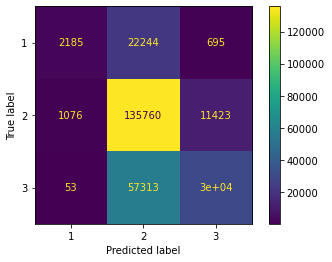

In [23]:
features = ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "material_used"]
adaboost.fit(data[features], label)
prediction_1 = adaboost.predict(data[features])
plot_confusion_matrix(adaboost, data[features], label)
print(f1_score(label, prediction_1, average="micro"))
# cross_val_score(adaboost, data[features], label, cv=3)
# random_forest.fit(data[features], label)
# prediction = pd.DataFrame(random_forest.predict(test_data[features]), columns=["damage_grade"])

0.7544138357105307


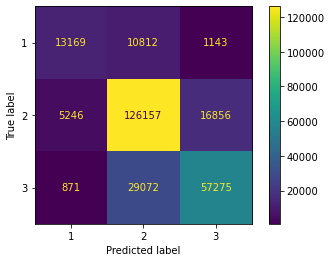

In [24]:
features = ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "material_used"]
random_forest.fit(data[features], label)
prediction_2 = random_forest.predict(data[features])
plot_confusion_matrix(random_forest, data[features], label)
print(f1_score(label, prediction_2, average="micro"))
# cross_val_score(adaboost, data[features], label, cv=3)
# random_forest.fit(data[features], label)
# prediction = pd.DataFrame(random_forest.predict(test_data[features]), columns=["damage_grade"])

0.7081285183095997


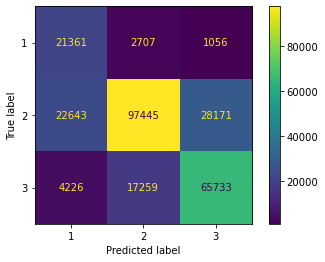

In [25]:
random_forest = RandomForestClassifier(class_weight="balanced")
features = ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "material_used"]
random_forest.fit(data[features], label)
prediction_3 = random_forest.predict(data[features])
plot_confusion_matrix(random_forest, data[features], label)
print(f1_score(label, prediction_3, average="micro"))
# cross_val_score(adaboost, data[features], label, cv=3)
# random_forest.fit(data[features], label)
# prediction = pd.DataFrame(random_forest.predict(test_data[features]), columns=["damage_grade"])

In [26]:
prediction = pd.DataFrame({"0" :prediction_1, "1" :prediction_2, "2" :prediction_3})

In [44]:
f1_score(label, prediction_mode, average="micro")

0.7512212155747675

In [41]:
from scipy.stats import mode
prediction_mode = mode(np.array(prediction), axis=1)[0]

In [43]:
prediction_mode

array([[3],
       [2],
       [3],
       ...,
       [3],
       [2],
       [3]], dtype=int64)

In [67]:
prediction["building_id"] = test_data["building_id"]
prediction.set_index("building_id", inplace=True)

In [68]:
prediction.to_csv("second_prediction_20_10.csv")

In [46]:
features = ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "material_used", "new_var"]
cross_val_score(random_forest, data[features], label, cv=3)

array([0.72754901, 0.72718063, 0.73056512])

In [106]:
abs(data.corr()["age"]).sort_values(ascending=False)

age                                       1.000000
new_var                                   0.851280
count_floors_pre_eq                       0.265359
has_superstructure_mud_mortar_brick       0.224800
has_superstructure_adobe_mud              0.189325
height_percentage                         0.184176
damage_grade                              0.155638
has_superstructure_cement_mortar_brick    0.138178
position                                  0.106663
ground_floor_type                         0.102698
has_superstructure_rc_engineered          0.099280
foundation_type                           0.098038
material_used                             0.088790
has_superstructure_rc_non_engineered      0.087874
roof_type                                 0.087754
legal_ownership_status                    0.084943
has_superstructure_mud_mortar_stone       0.058958
has_secondary_use_hotel                   0.050830
geo_level_1_id                            0.049973
has_superstructure_bamboo      

In [30]:
random_forest = RandomForestClassifier()
features = ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "material_used", "age"]
cross_val_score(random_forest, data[features], label, cv=3)

array([0.6947057 , 0.69442942, 0.69590293])

In [17]:
features = ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "material_used"]
random_forest.fit(data[features], label)
prediction = pd.DataFrame({"damage_grade": random_forest.predict(test_data[features])})
prediction["building_id"] = test_data["building_id"]
prediction.set_index("building_id", inplace=True)

In [19]:
prediction.to_csv("20_02.csv")

### Model 2

In [72]:
# New variable for condition of the house
features = ["count_floors_pre_eq", "age", "area_percentage", "height_percentage", "land_surface_condition", \
           "foundation_type", "roof_type", "ground_floor_type", "other_floor_type", "plan_configuration"]

#random_forest.fit(data[features], label)
#prediction_model_2 = random_forest.predict(data[features])
# score = cross_val_score(random_forest, data[["roof_type"]], label, cv=3)
random_forest = RandomForestClassifier(class_weight="balanced")
for feature in features:
    random_forest.fit(data[[feature]], label)
    data[feature] = random_forest.predict(data[[feature]])

In [73]:
score = cross_val_score(random_forest, data[features], label, cv=3)

In [75]:
score

array([0.35663716, 0.35693647, 0.35704007])

### Model 3

In [44]:
features = ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "material_used"]
logistic_regression.fit(data[features], label)
prediction_model_3 = logistic_regression.predict(data[features])

### Model 4

In [45]:
features = ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "material_used"]
adaboost.fit(data[features], label)
prediction_model_4 = adaboost.predict(data[features])

### Ensemble using Logistic Regression

In [46]:
prediction = pd.DataFrame({"Prediction 1": prediction_model_1, "Prediction 2": prediction_model_2, \
                          "Prediction 3": prediction_model_3, "Prediction 4": prediction_model_4})

In [47]:
score = cross_val_score(random_forest, prediction[["Prediction 1", "Prediction 3", "Prediction 4"]], label, cv=3)

In [48]:
np.array(score).mean()

0.7544138357105307

In [28]:
np.array(score).mean()

0.7544099984267136

In [31]:
np.array(score).mean()

0.7547783776731478

In [29]:
np.array(score).mean()

0.7552158280282883